# **МЕТОДЫ ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ. АЛГОРИТМ CART**

Существует несколько стратегий построения деревьев решений, но для нас будет представлять интерес только одна из них — алгоритм **CART**. Для особо любознательных мы собрали краткий список основных стратегий и указали их основные отличия друг от друга.

Основные алгоритмы построения деревьев и их отличия:

+ ID3 (Iterative Dichotomiser 3) был разработан Джоном Куинланом (как и два последующих алгоритма) в 1986 году. Алгоритм создаёт многостороннее дерево, находя для каждого узла категориальный признак, который даст наибольший информационный выигрыш. Деревья вырастают до максимального размера, а затем обычно применяется этап обрезки, чтобы улучшить обобщающую способность деревьев и избежать переобучения.

 Ограничения алгоритма:

 + все факторы должны быть категориальными;
 + предназначен для решения задач классификации.

+ C4.5 — алгоритм-преемник ID3. Он снимает ограничение, что факторы обязательно должны быть категориальными, путём разбиения непрерывного числового фактора на дискретный набор интервалов. C4.5 преобразует обученные деревья в наборы правил «если, ... то». Затем оценивается точность каждого правила, чтобы определить порядок, в котором они должны применяться.

+ C5.0 — последняя лицензированная версия алгоритма. C5.0 использует меньше памяти и создаёт меньшие наборы правил, чем C4.5, но при этом является более точным.

## **CART (Classification and Regression Tree)** — это алгоритм, предназначенный для построения бинарных деревьев решений. Он очень похож на C4.5, однако, в отличие от последнего, предназначен как для задач классификации, так и для задач регрессии. CART важен для нас, поскольку именно он используется для построения моделей решающих деревьев в sklearn.

Далее мы увидим, что CART строит деревья, используя факторы и пороговые значения, которые дают наилучшее уменьшение неоднородности (неопределённости) или, иначе говоря, наибольший прирост информации в каждой вершине дерева.

Разбирать алгоритм мы будем по частям на простых примерах, а затем сложим их все воедино. Итак, начнём ↓

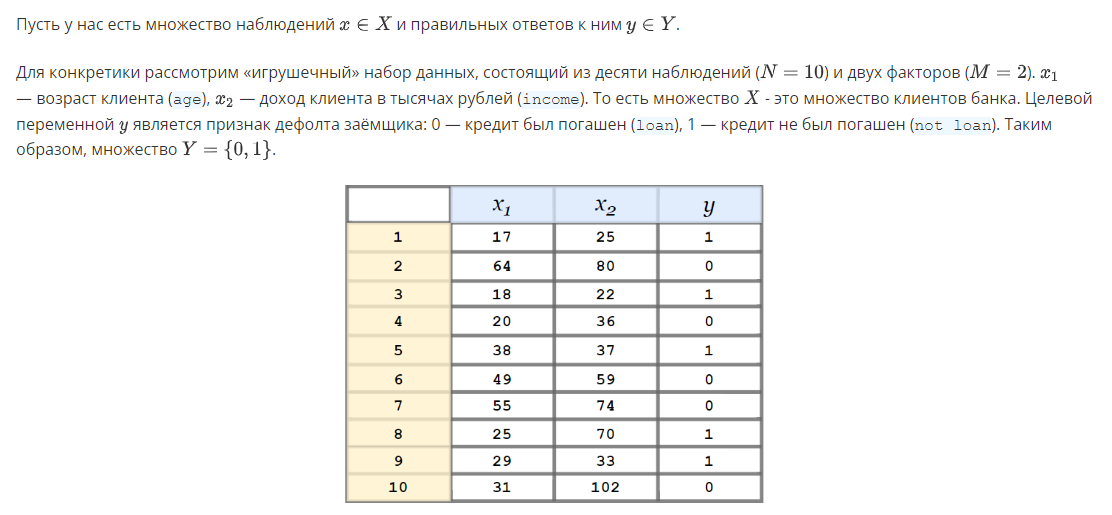

Нам необходимо построить алгоритм $a(x)$ — дерево решений, которое для клиентов из множества $X$ выдаёт ответ из множества $Y$ (выплатит ли заёмщик кредит).

По опыту работы с линейной регрессией мы знаем, что у моделей всегда есть внутренние параметры, которые мы пытаемся оптимизировать так, чтобы ошибка между ответами и предсказаниями на обучающей выборке была наименьшей. Обозначим эти параметры буквой $w$. 

Для начала разберёмся, что является внутренними параметрами дерева.

Под **внутренними параметрами** $w$ понимается структура дерева, а именно последовательность предикатов 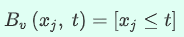 и сами параметры $j$ (номер признака, по которому строится условие в предикате) и $t$ (пороговое значение для условия), то есть $w = (j, t)$.

Как мы уже заметили ранее, оптимизировать структуру дерева с помощью знакомых нам численных методов оптимизации, таких как SGD, не получится. Но как же тогда решить эту задачу? Как подобрать последовательность вопросов внутри вершин дерева?

Чтобы ответить на этот вопрос, воспользуемся декомпозицией — разобьём эту сложную задачу на задачи поменьше.

Фундамент начинается с первого кирпича, а дерево решений — с пня. Чтобы понять, как происходит построение дерева произвольной глубины, нам сначала необходимо научиться строить **решающие пни** — деревья глубины 1. Пример такого решающего пня можно увидеть ниже:

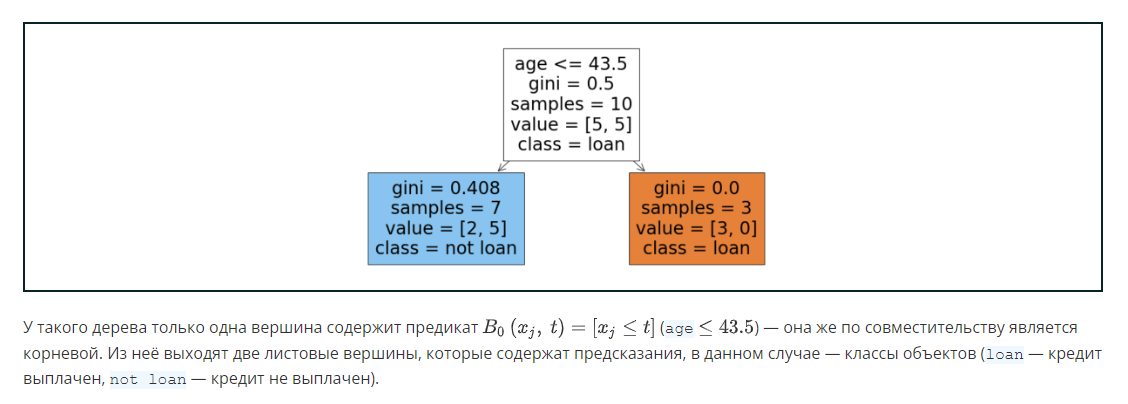

## Ещё говорят так: корневая вершина в данном случае является **родительской**, а две другие — её **потомками**. 

Чтобы построить решающий пень, нам нужно лишь определить, какое решающее правило будет содержаться в корневой вершине. Говоря на языке машинного обучения, нам нужно найти наилучшие по заданному критерию параметры предиката — $j$ и $t$.

Займёмся этим чуть ниже, а пока — несколько заданий на закрепление изученного ↓

## Задание 3.1

Что принято подразумевать под термином «решающий пень»?

+ Дерево решений глубины 1


## Задание 3.2

Что означает «построить решающий пень»?

+ Найти параметры предиката (номер признака и пороговое значение для него).

# **КАНДИДАТЫ В ПАРАМЕТРЫ РАЗБИЕНИЯ**

Как и ранее, мы будем рассматривать простые предикаты вида: 

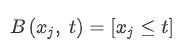

### **Примечание.** Так как мы рассматриваем построение решающего пня, у которого только одна вершина содержит предикат, индекс номера вершины только один — $v = 0$. Чтобы постоянно не прописывать этот индекс, его можно опустить.

Из модулей по математическому анализу мы знаем, что, употребляя слово «оптимальный», необходимо делать важную оговорку — оптимальный по какому критерию?

Забегая немного вперёд, давайте введём критерий оптимальности — некоторую меру **неоднородности (impurity)** $G(X, y, w)$, которая будет  показывать, насколько большой разброс целевой переменной y для объектов из множества $X$ наблюдается в дочерних вершинах при параметрах сплита $w$.

Что это за функция и как она выглядит, мы обсудим уже в следующем юните, а пока представим, что она задана какой-то формулой. Мы бы хотели построить пень таким образом, чтобы минимизировать эту неоднородность:

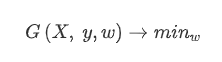

### **Примечание.** Иначе говоря, мы хотим сделать так, чтобы разброс ответов в дочерних вершинах был как можно меньше. В идеале необходимо создать такой предикат, чтобы в левую и правую вершины попали как можно наиболее схожие объекты (например, в случае задачи классификации — объекты какого-то одного класса).

Поскольку мы не можем привлечь математические методы оптимизации, будем действовать по старинке — «в лоб».

Параметры $w = (j, t)$ можно найти простым перебором. В качестве кандидата на пороговое значение $t$ можно рассматривать среднее значение между двумя соседними уникальными значениями отсортированного фактора $x_j$.

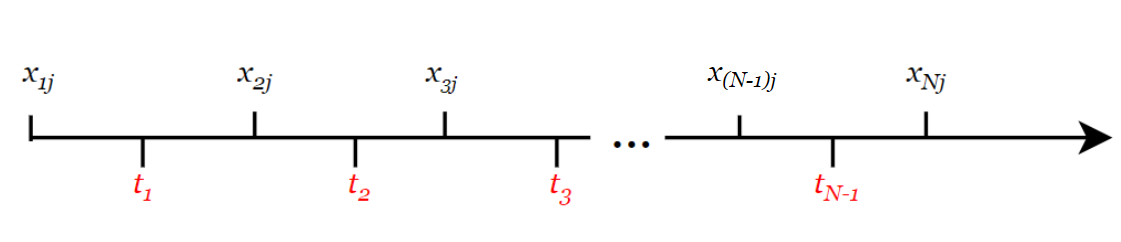

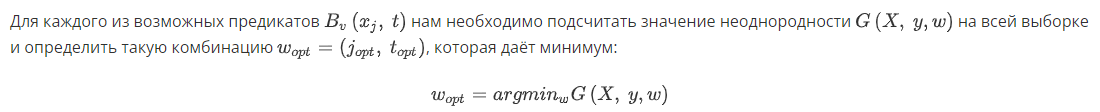

Псевдокод такого алгоритма будет иметь вид (запускать его не нужно):



```
min_loss = inf
optimal_split_params = None
for j in range(M):
    thresholds = find_candidates_for_thresholds(X[:, j], y)
    for t in thresholds:
        split_params = (j, t)
        loss = calculate_loss(X, y, split_params)
        if loss < min_loss:
            min_loss = loss
            optimal_split_params = split_params

```

### **Примечание.** Здесь inf означает бесконечность, то есть до начала работы алгоритма перебора значение переменной min_loss — какое-то очень большое число.

Итого, если у нас есть $M$ факторов и $N$ наблюдений, то, чтобы найти оптимальные параметры разбиения, нам в худшем случае понадобится перебрать $M(N-1)$ комбинаций.


### Примечание. Факторы могут быть как числовыми, так и категориальными, и алгоритм CART в общем случае предусматривает работу с обоими видами, однако в sklearn такая функциональность не поддерживается (на июль 2022 года).

Библиотека предполагает, что категориальные признаки закодированы каким-то из способов кодирования и представлены в числовом виде. Так как мы с вами будем акцентировать внимание именно на реализации алгоритма построения деревьев в sklearn, то мы не будем рассматривать работу с категориальными признаками как с текстом.

---

Посмотрим, как найти параметры разбиения в решающем пне на примере приведённого выше датасета.

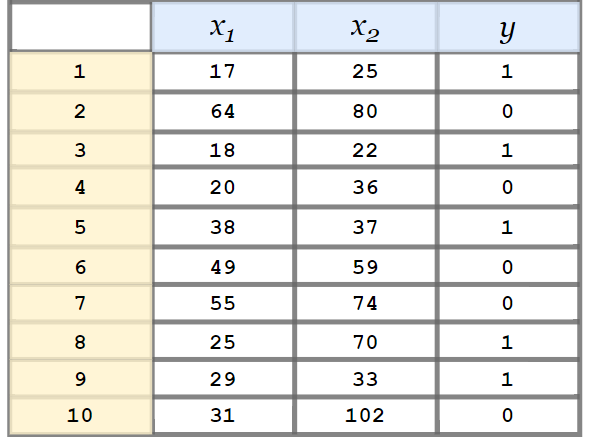

Начнём определение кандидатов в предикаты в корневую вершину с первого фактора — $x_1$ (возраста клиента).

Для того чтобы создать пороговые значения для $x_j$, необходимо:

1. Отсортировать числовой фактор $x_j$ по возрастанию:

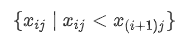

2. Вычислить среднее между двумя соседними уникальными значениями фактора. Более простое название такой операции — **скользящее среднее:**

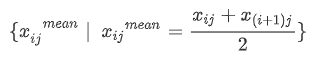

Сортируем клиентов по возрастанию возраста $x_1$. Затем вычисляем среднее между двумя соседними значениями — они и будут кандидатами на пороги $t$ для фактора $x_1$.

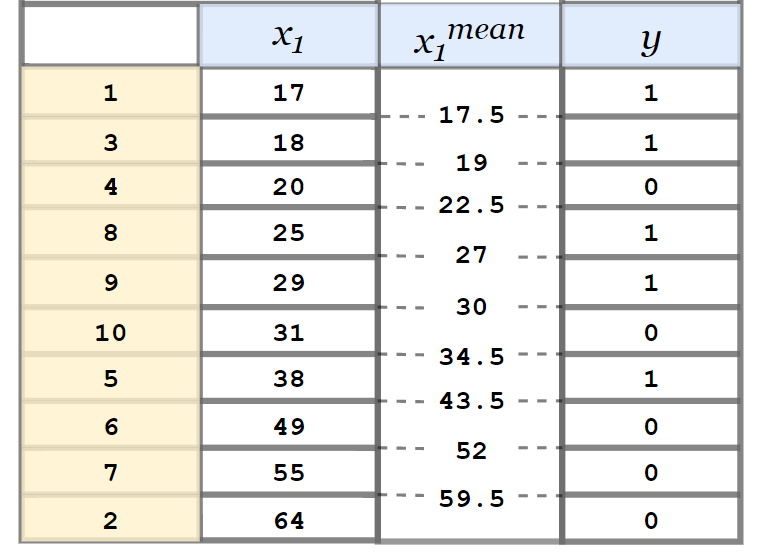

Теперь посмотрим, какие возможные пороговые значения существуют для фактора $x_2$ (дохода клиента). Проделав те же самые операции, получим:

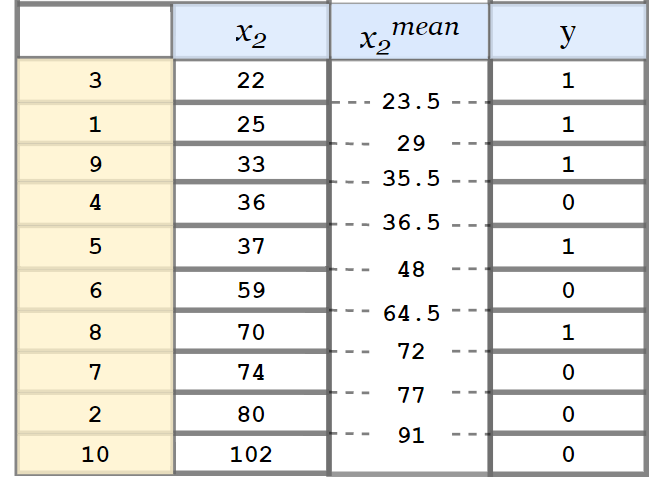

Итак, в качестве кандидатов на предикат корневой вершины $B(x_j, t)$ мы выдвигаем следующие решающие правила:

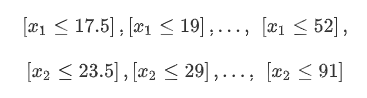

Итого у нас получится 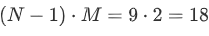 комбинаций $j$ и $t$. 

→ Мы понимаем, что с ростом числа наблюдений $N$ и факторов $M$ количество комбинаций будет очень сильно расти. Представьте себе утрированную (но всё же возможную) ситуацию: у вас есть датасет на $N = 10000$ наблюдений и $M = 100$ факторов, и каждый из факторов полностью состоит из уникальных значений. В таком случае для того, чтобы построить решающий пень, вам понадобится $N*M = 10^6$ операций. Согласитесь, многовато для одной вершины в дереве. И это ещё без учёта того, что факторы в алгоритме CART сортируются, а сортировка — тоже довольно «дорогая» операция.

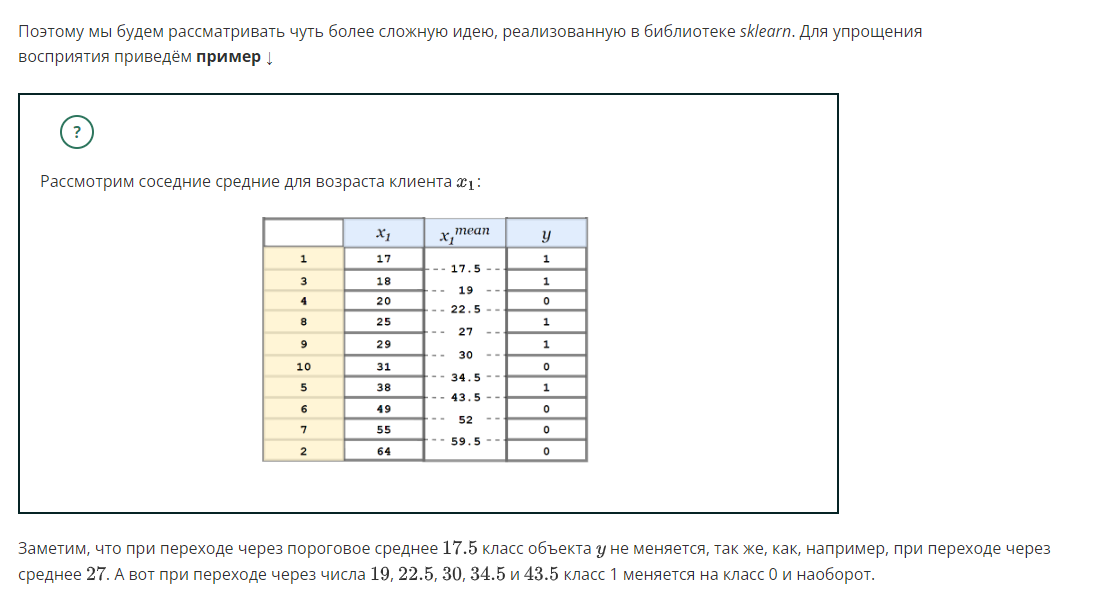

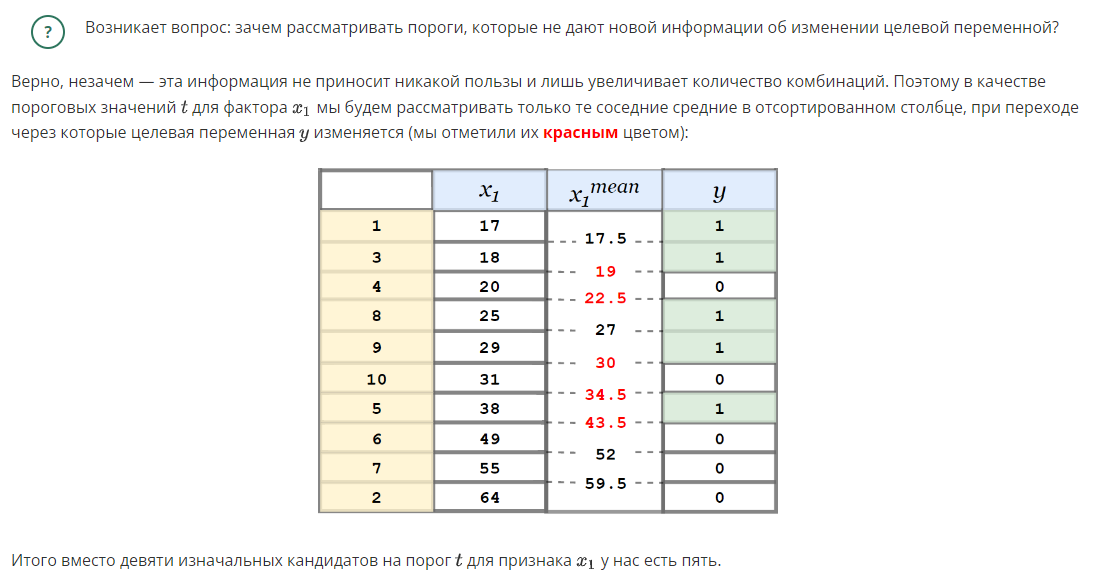

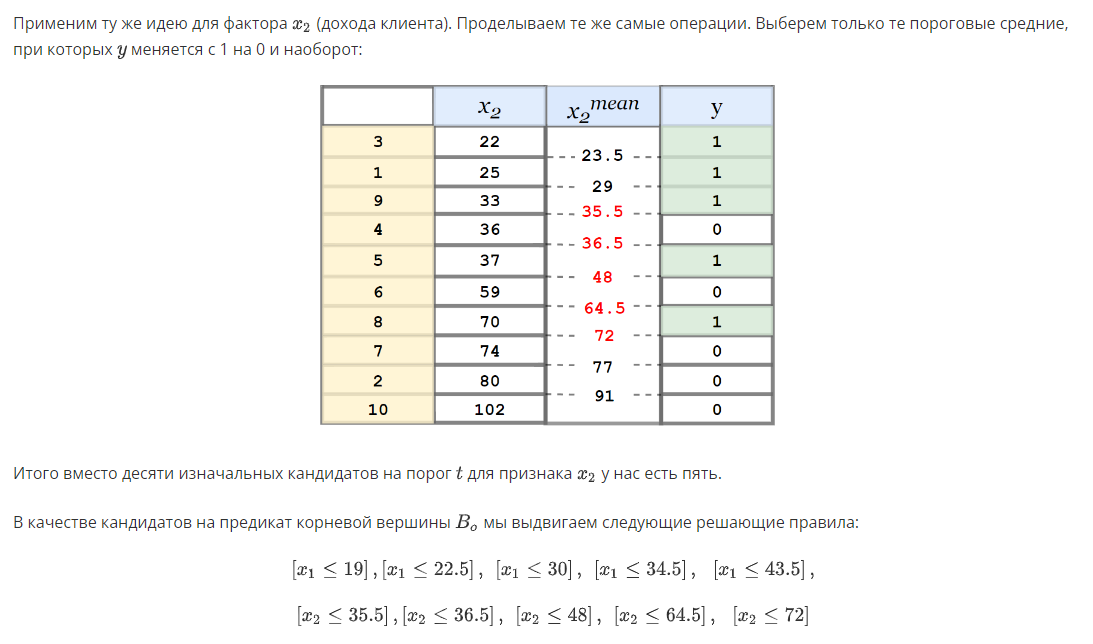

Таким образом, мы получили десять комбинаций $j$ и $t$, которые нам необходимо перебрать, чтобы найти оптимальные. Напомним, что в прошлом примере у нас получалось 18 комбинаций, то есть число рассматриваемых для построения решающего пня случаев сократилось почти вдвое.

Конечно, так бывает не всегда: например, если целевая переменная $y$ состоит полностью из уникальных значений, такая методика не сработает. Однако в большинстве практических случаев данная эвристика значительно уменьшает количество итераций и тем самым сокращает время построения дерева решений. 

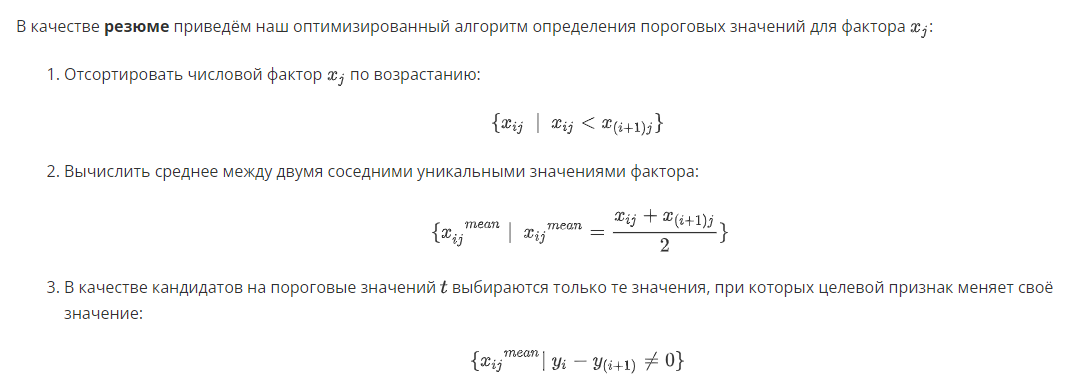

Теперь, когда мы научились считать вручную, настало время реализовать на Python полученный нами способ определения кандидатов в параметры предиката. Будем это делать на примере признака возраста:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

In [3]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
x = data['age']
y = data['loan']

Сначала отсортируем фактор по возрастанию с помощью метода sort_values() и удалим из него дубликаты с помощью метода drop_duplicates():

In [4]:
x = x.sort_values().drop_duplicates()
print(x.values)

[17 18 20 25 29 31 38 49 55 64]


Для вычисления скользящего среднего в Pandas можно воспользоваться комбинацией методов rolling() и mean(). В методе rolling() необходимо указать окно, в котором считается среднее (в нашем случае оно равно 2):

In [5]:
x_roll_mean = x.rolling(2).mean()
print(x_roll_mean.values)

[ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


В результате вычисления скользящего среднего всегда будет образовываться один пропуск. Для его исключения воспользуемся методом dropna():

In [6]:
x_roll_mean = x_roll_mean.dropna()
print(x_roll_mean.values)

[17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


Наконец, необходимо отфильтровать x так, чтобы в результат попали только те значения, при переходе через которые целевая переменная меняется. Для этого мы отсортируем y в соответствии с индексами x, затем вычислим разницу между соседними значениями y с помощью метода diff(). После этого произведём фильтрацию:

In [7]:
y = y[x_roll_mean.index]
y_roll_mean = y.diff()
candidates = x_roll_mean[y_roll_mean != 0]
print(candidates.values)

[17.5 19.  22.5 30.  34.5 43.5]


Мы получили тот результат, что и при ручном счёте.

Удобнее будет оформить полученный алгоритм в виде функции find_candidates_for_thresholds(). Она будет принимать на вход фактор x и целевую переменную y и возвращать кандидатов в пороговые значения для y в виде numpy-массива:

In [8]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

Проверим нашу функцию:

In [9]:
print(find_candidates_for_thresholds(data['age'], data['loan']))
print(find_candidates_for_thresholds(data['income'], data['loan']))

[17.5 19.  22.5 30.  34.5 43.5]
[23.5 34.5 36.5 48.  64.5 72. ]


Теперь для завершения построения решающего пня нам осталось только научиться считать критерий качества при различных значениях параметров разбиения, чтобы находить оптимальные из них. Об этом мы поговорим в следующем юните. А пока выполните задания на закрепление материала ↓

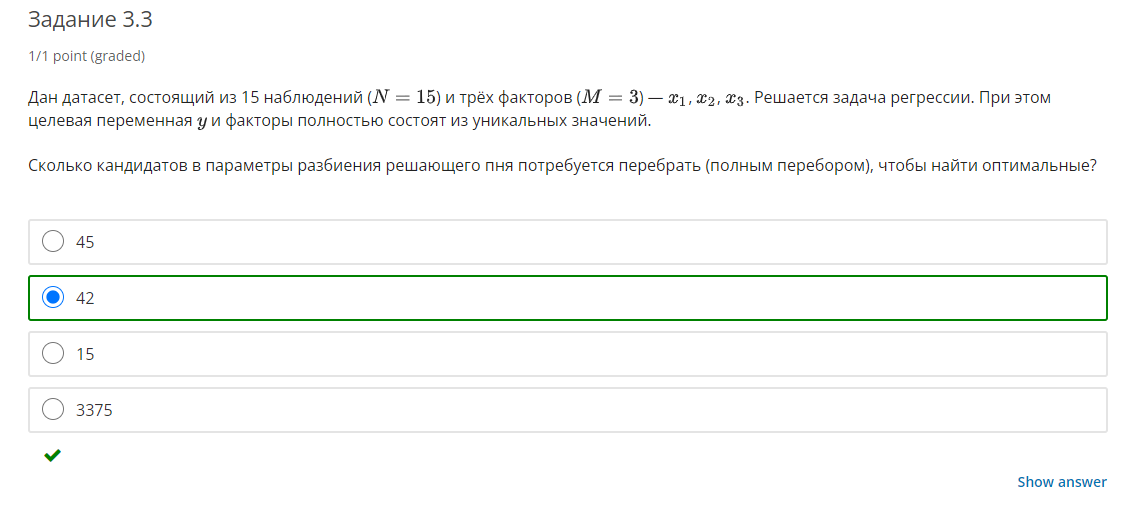

## Задание 3.4

Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:

In [12]:
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

Найдите уникальных кандидатов на пороговое значение $t$ для фактора $x_1$ (Lot Frontage).

In [13]:
print(find_candidates_for_thresholds(ames_sample['Lot Frontage'], ames_sample['SalePrice']))

[ 53.  58.  61.  65.  69.  71.  76.  86.  94. 101.]


## Задание 3.5

Для части датасета о домах в Айове из предыдущего задания найдите уникальных кандидатов на пороговое значение $t$ для фактора $x_2$ (Lot Area).

Выберите верный вариант ответа:

In [14]:
print(find_candidates_for_thresholds(ames_sample['Lot Area'], ames_sample['SalePrice']))

[ 5508.   7153.   7425.   7949.   8405.5  8526.5  8850.   9137.5  9466.
 10051.5 10507.  10834.  11365.  12288. ]
